<a href="https://colab.research.google.com/github/Ardramariya/Aesthetix_Projects/blob/main/MainProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import tensorflow
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_images = r"/content/drive/MyDrive/ArtDataset/dataset/train"

In [ ]:
from fastai.vision import *

In [ ]:
path = "/content/drive/MyDrive/ArtDataset/dataset/test"

In [ ]:

## Image Preprocessing using keras


# As we know deep-learning is hungry for data, the data we have is only limited.
# so lets perform **Image Agumentation** to create different versions
# of the original image, which leads to a better model, since it learns
# on the good and bad mix of images.

from keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [ ]:
# No transformations are made on the test data
test_gen = ImageDataGenerator()

In [ ]:

# Generating training data
training_data = train_gen.flow_from_directory(
    train_images,
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'categorical'
)

Found 6249 images belonging to 13 classes.


In [ ]:

# generating test data
testing_data = test_gen.flow_from_directory(
    train_images,
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'categorical'
)

Found 6249 images belonging to 13 classes.


In [ ]:

# Printing class labels for each face
testing_data.class_indices

{'Koodiyattam': 0,
 'Oppana': 1,
 'Padayani': 2,
 'Theyyam': 3,
 'Thullal': 4,
 'bharatanatyam': 5,
 'kathak': 6,
 'kathakali': 7,
 'kuchipudi': 8,
 'manipuri': 9,
 'mohiniyattam': 10,
 'odissi': 11,
 'sattriya': 12}

In [ ]:
# training_data have numeric tag for each face
Train_class = training_data.class_indices

In [ ]:

# lets store them in a dictionary with swap for future reference
Result_class = {}
for value_tag, face_tag in zip(Train_class.values(),Train_class.keys()):
    Result_class[value_tag] = face_tag

In [ ]:
# use pickle to save the mapping's
import pickle
with open(r'/content/drive/MyDrive/ArtDataset/FaceRecognition.pkl','wb') as Final_mapping:
    pickle.dump(Result_class,Final_mapping)

In [ ]:

print("Mapping of Face and its numeric value",Result_class)

Output_Neurons=len(Result_class) # The Number of output neurons in softmax

Mapping of Face and its numeric value {0: 'Koodiyattam', 1: 'Oppana', 2: 'Padayani', 3: 'Theyyam', 4: 'Thullal', 5: 'bharatanatyam', 6: 'kathak', 7: 'kathakali', 8: 'kuchipudi', 9: 'manipuri', 10: 'mohiniyattam', 11: 'odissi', 12: 'sattriya'}


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

'''Initializing the Convolutional Neural Network'''
Model = Sequential()

In [ ]:
Model.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), input_shape = (100,100,3),activation='relu'))

In [ ]:
Model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
Model.add(Conv2D(32,kernel_size=(3,3),strides=(1,1),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
Model.add(Flatten())

In [ ]:
Model.add(Dense(64,activation='relu'))
Model.add(Dense(Output_Neurons,activation='softmax'))

In [ ]:
Model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['Accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
call = EarlyStopping(
                    min_delta=0.005,
                    patience=5,
                     verbose=1
                    )

In [ ]:
import time
StartTime=time.time()

In [ ]:
Model.fit_generator(training_data,
          epochs = 8,
          validation_data=testing_data,
                   callbacks=call)

Endtime = time.time()
print('Total Training Time taken: ',round((Endtime-StartTime)/60),'Minutes')

<ipython-input-68-c2a94a860908>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Model.fit_generator(training_data,


Epoch 1/8
209/209 [==============================] - 2592s 12s/step - loss: 6.2856 - Accuracy: 0.4196 - val_loss: 1.1542 - val_Accuracy: 0.6419
Epoch 2/8
209/209 [==============================] - 183s 877ms/step - loss: 0.9896 - Accuracy: 0.7032 - val_loss: 0.6599 - val_Accuracy: 0.7977
Epoch 3/8
209/209 [==============================] - 206s 987ms/step - loss: 0.6055 - Accuracy: 0.8221 - val_loss: 0.4449 - val_Accuracy: 0.8651
Epoch 4/8
209/209 [==============================] - 203s 972ms/step - loss: 0.4810 - Accuracy: 0.8630 - val_loss: 0.2780 - val_Accuracy: 0.9177
Epoch 5/8
209/209 [==============================] - 186s 890ms/step - loss: 0.3420 - Accuracy: 0.9011 - val_loss: 0.2405 - val_Accuracy: 0.9366
Epoch 6/8
209/209 [==============================] - 183s 876ms/step - loss: 0.2715 - Accuracy: 0.9216 - val_loss: 0.1922 - val_Accuracy: 0.9443
Epoch 7/8
209/209 [==============================] - 182s 874ms/step - loss: 0.1990 - Accuracy: 0.9421 - val_loss: 0.1106 - val_Acc

In [ ]:
test_loss, test_acc = Model.evaluate(testing_data, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')


209/209 - 51s - loss: 0.1780 - Accuracy: 0.9483 - 51s/epoch - 242ms/step
Test accuracy: 94.83%


In [ ]:
import numpy as np
from keras.preprocessing import image
import os
import glob

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

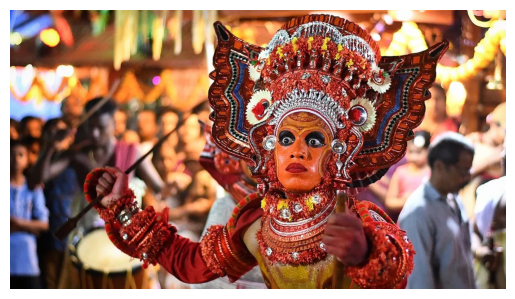

In [ ]:
ImagePath=r"/content/1280px-Theyyam_of_Kerala_3.jpg"

# Load the image using image.load_img
img = image.load_img(ImagePath)

# Display the image
plt.imshow(img) # Pass the image data, not the file path.
plt.axis('off')  # Turn off axis labels
plt.show()

test_image=image.load_img(ImagePath,target_size=(100, 100))
test_image=image.img_to_array(test_image)

test_image = image.img_to_array(test_image)

In [ ]:
test_image=np.expand_dims(test_image,axis=0)
result=Model.predict(test_image,verbose=0)

print('This is',Result_class[np.argmax(result)])

This is Theyyam


In [ ]:
Model.save('cnn_model.keras')